In [2]:
import os 
from openbabel import pybel
from vina import Vina
os.chdir('/home/brightmoon/Experimental Class/3CL Protease/Virtual_Screen')


In [3]:
for i in range(1,21):
    mol_id = f'may{i}'
    # if the ligand endwith pdb: from pdb to mol2
    mol = pybel.readfile('pdb', f'./{mol_id}.pdb').__next__()
    mol.write('mol2', f'./{mol_id}.mol2', overwrite=True)
    os.system(f'prepare_ligand -l {mol_id}.mol2 -o {mol_id}.pdbqt')
    v = Vina(sf_name='vina')
    v.set_receptor('7en8_receptor.pdbqt')
    v.set_ligand_from_file(f'{mol_id}.pdbqt')
    v.compute_vina_maps(center=[-5.5, -7.75,26.25], box_size=[12.0, 15.5, 18.5])
    # Dock the ligand
    v.dock(exhaustiveness=32, n_poses=10)
    v.write_poses(f'{mol_id}_out.pdbqt', n_poses=10, overwrite=True)

Computing Vina grid ... done.
Performing docking (random seed: 1907290676) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -6.829          0          0
   2       -6.696      1.272      1.625
   3       -6.673      1.705      2.804
   4       -6.615      1.544      2.445
   5       -6.387      6.214      8.458
   6       -6.324      1.755      2.299
   7       -6.293      6.398      8.788
   8       -5.957      2.161      2.536
   9       -5.955      2.619      3.514
  10       -5.951      2.299      2.606
Computing Vina grid ... done.
Performing docking (random seed: 865773011) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************


In [10]:
from matplotlib import pyplot as plt
import numpy as np

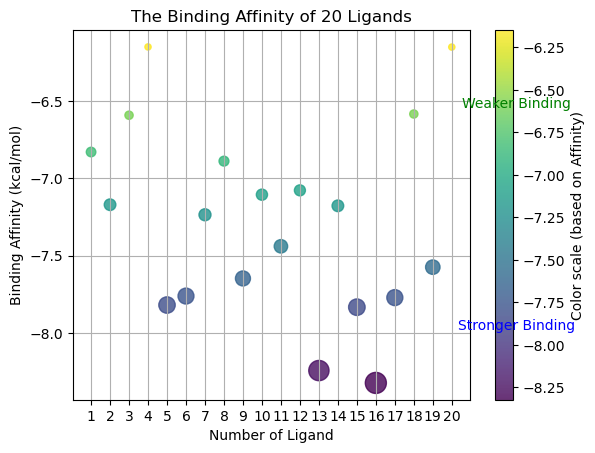

In [34]:
# Function to extract binding affinities from Vina log file
def extract_vina_results(file_path):
    affinities = []
    
    # Open the Vina log file for reading
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("REMARK VINA RESULT:"):
                # Split the line by spaces and extract the affinity value (2nd element after splitting)
                affinity = float(line.split()[3])
                affinities.append(affinity)
    
    return affinities[0]
res = []
num = list(range(1,21))
for i in num:
    vina_output_file = f'may{i}_out.pdbqt'  # Replace with the actual path to your file
    affinities = extract_vina_results(vina_output_file)
    res.append(affinities)
res = np.array(res)
plt.scatter(num,res,c=res, s=1e-5 * res**8, cmap='viridis', alpha=0.8)
plt.title('The Binding Affinity of 20 Ligands')
plt.ylabel('Binding Affinity (kcal/mol)')
plt.xlabel('Number of Ligand')
plt.xticks(num)
plt.grid(True)
cbar = plt.colorbar()
cbar.set_label('Color scale (based on Affinity)')
# Annotating the color bar with text
cbar.ax.text(1.2, 0.2, 'Stronger Binding', ha='center', va='center', fontsize=10, color='blue', transform=cbar.ax.transAxes)
cbar.ax.text(1.2, 0.8, 'Weaker Binding', ha='center', va='center', fontsize=10, color='green', transform=cbar.ax.transAxes)

plt.show()

In [1]:
res

NameError: name 'res' is not defined